# Import game data into a more useful data structure

In [61]:
from collections import Counter, defaultdict
import csv

with open('./game_data.csv', 'rb') as csvFile:
    gameDataReader = csv.reader(csvFile)
    gameDataReader.next()
    
    games = {}
    
    for row in gameDataReader:
        game = row[0]
        player = int(row[1])
        move = int(row[2]) - 1
        column = int(row[3])
        result = row[4]
        
        if game not in games:
            games[game] = {
                'players': set(),
                'moves': {}
            }
            
        games[game]['players'].add(player)
        games[game]['moves'][move] = (player, column)
        
        if result:
            # Cast players set to list so it is indexable
            games[game]['players'] = list(games[game]['players'])
            if result == 'win':
                games[game]['winner'] = player
                games[game]['draw'] = False
            else:
                games[game]['draw'] = True
    
print(games)

{'5988': {'players': [3784, 3962], 'draw': True, 'moves': {0: (3784, 3), 1: (3962, 1), 2: (3784, 3), 3: (3962, 4), 4: (3784, 1), 5: (3962, 1), 6: (3784, 3), 7: (3962, 4), 8: (3784, 2), 9: (3962, 3), 10: (3784, 4), 11: (3962, 2), 12: (3784, 1), 13: (3962, 4), 14: (3784, 2), 15: (3962, 2)}}, '5989': {'players': [1442, 3397], 'draw': False, 'moves': {0: (1442, 1), 1: (3397, 1), 2: (1442, 3), 3: (3397, 2), 4: (1442, 1), 5: (3397, 1), 6: (1442, 4), 7: (3397, 4), 8: (1442, 4), 9: (3397, 4), 10: (1442, 2), 11: (3397, 2), 12: (1442, 3), 13: (3397, 2), 14: (1442, 3), 15: (3397, 3)}, 'winner': 3397}, '5982': {'players': [1512, 1410], 'draw': True, 'moves': {0: (1512, 1), 1: (1410, 4), 2: (1512, 1), 3: (1410, 1), 4: (1512, 3), 5: (1410, 3), 6: (1512, 3), 7: (1410, 2), 8: (1512, 4), 9: (1410, 1), 10: (1512, 4), 11: (1410, 2), 12: (1512, 2), 13: (1410, 4), 14: (1512, 3), 15: (1410, 2)}}, '5983': {'players': [1106, 2108], 'draw': False, 'moves': {0: (1106, 2), 1: (2108, 1), 2: (1106, 1), 3: (2108, 3

# Analyze and plot starting moves

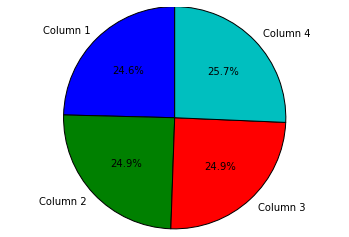

In [4]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

startingMoves = Counter()

for game in games:
    startingMove = games[game]['moves'][0][1]
    startingMoves[startingMove] += 1
    
labels = ['Column {}'.format(col) for col in startingMoves]
sizes = startingMoves.values()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

# Analyze results by starting move

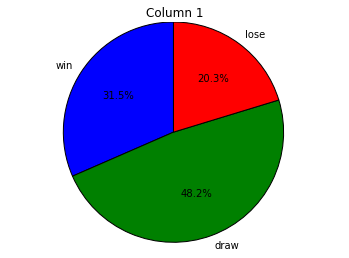

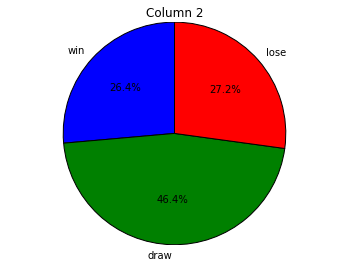

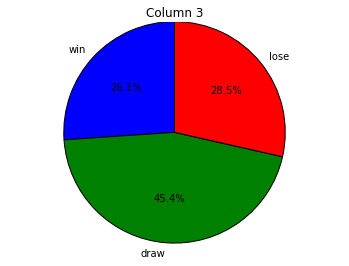

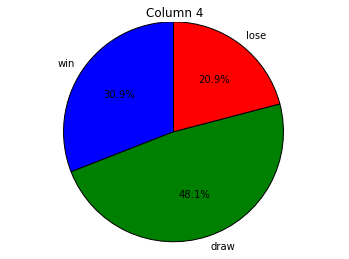

In [13]:
%matplotlib inline

from collections import Counter, defaultdict
import matplotlib.pyplot as plt

resultsByStartingMove = defaultdict(Counter)

for gameNum in games:
    game = games[gameNum]
    startingMove = game['moves'][0][1]
    startingPlayer = game['moves'][0][0]
    
    if game['draw']:
        resultsByStartingMove[startingMove]['draw'] += 1
    elif game['winner'] == startingPlayer:
        resultsByStartingMove[startingMove]['win'] += 1
    else:
        resultsByStartingMove[startingMove]['lose'] += 1
        
for startingMove in resultsByStartingMove:
    results = resultsByStartingMove[startingMove]
    labels = results.keys()
    sizes = results.values()
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')

    plt.title('Column {}'.format(startingMove))
    plt.show()

# Explore results by move sequence

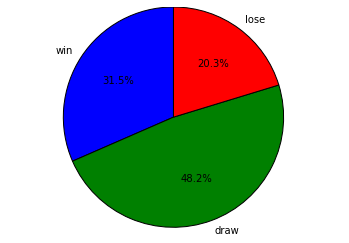

In [160]:
from collections import Counter, defaultdict

resultsByMoves = defaultdict(Counter)

for gameNum in games:
    game = games[gameNum]
    startingPlayer = game['moves'][0][0]
    
    for i in range(0, len(game['moves'])):
        moves = [game['moves'][j][1] for j in range(0,i)]
        movesKey = tuple(moves)
        
        if game['draw']:
            resultsByMoves[movesKey]['draw'] += 1
        elif game['winner'] == startingPlayer:
            resultsByMoves[movesKey]['win'] += 1
        else:
            resultsByMoves[movesKey]['lose'] += 1
        
def getResultsByMoves(moves):
    movesKey = tuple(moves)
    return resultsByMoves[movesKey]

def graphResultsByMoves(moves):
    results = getResultsByMoves(moves)
    
    labels = results.keys()
    sizes = results.values()
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')

    plt.show()
    
graphResultsByMoves([1])

# When do you consider a game "called?"

1
1
1
1
Counter({'not_called': 4})
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.0, 0.0, 0.0, 0.203125, 0.484375, 0.6646942800788954, 0.8550977653631285, 0.9413673232908459, 0.9803434719635837, 0.9938960218901284]


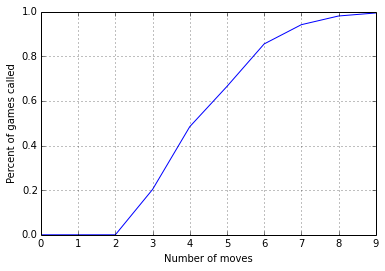

In [159]:
from collections import Counter, defaultdict

# Can we consider a game "won" or called before the final result is in?
# Think like calling an election
# Perhaps a threshold value of predicted win/loss ratio, 2:1 margin either way

threshold = .66

resultsByNumMoves = defaultdict(Counter)

for move in resultsByMoves.keys():
    numMoves = len(move)
    results = resultsByMoves[move]
    win = results['win']
    lose = results['lose']
    total = win + lose
    
    if total > 0:
        if (win/float(total) > threshold) or (lose/float(total) > threshold):
            resultsByNumMoves[numMoves]['called'] += 1
        else:
            resultsByNumMoves[numMoves]['not_called'] += 1
            
# Something is funky here, we should have more results for smaller numbers of moves
print resultsByNumMoves[1]
        
numMovesList = []
percentCalledList = []

for numMoves in range(0,10):
    numMovesList.append(numMoves)
    
    results = resultsByNumMoves[numMoves]
    called = results['called'] if 'called' in results else 0
    notCalled = results['not_called']
    totalGames = called + notCalled
    percentCalled = called/float(totalGames)
    
    percentCalledList.append(percentCalled)
    
print numMovesList
print percentCalledList

fig1, ax1 = plt.subplots()
ax1.plot(numMovesList, percentCalledList)

ax1.set(xlabel="Number of moves", ylabel="Percent of games called")
ax1.grid()

plt.show()

# Explore results by player

In [46]:
from collections import Counter, defaultdict

resultsByPlayer = defaultdict(Counter)

for gameNum in games:
    game = games[gameNum]
    player1 = game['moves'][0][0]
    player2 = game['moves'][1][0]
        
    if game['draw']:
        for player in game['players']:
            resultsByPlayer[player]['draw'] += 1
    elif game['winner'] == player1:
        resultsByPlayer[player1]['win'] += 1
        resultsByPlayer[player2]['lose'] += 1
    else:
        resultsByPlayer[player2]['win'] += 1
        resultsByPlayer[player1]['lose'] += 1
        
    resultsByPlayer[player1]['played'] += 1
    resultsByPlayer[player2]['played'] += 1
        
playersList = [
    {
        'player': player, 
        'win': resultsByPlayer[player]['win'], 
        'lose': resultsByPlayer[player]['lose'],
        'draw': resultsByPlayer[player]['draw'],
        'score': (resultsByPlayer[player]['win'] - resultsByPlayer[player]['lose'])
    } for player in resultsByPlayer]

playersList.sort(key=lambda player: player['win'], reverse=True)
for player in playersList[0:10]:
    print(player)

{'player': 3140, 'draw': 0, 'lose': 0, 'score': 8, 'win': 8}
{'player': 1568, 'draw': 2, 'lose': 0, 'score': 6, 'win': 6}
{'player': 3107, 'draw': 3, 'lose': 2, 'score': 4, 'win': 6}
{'player': 586, 'draw': 2, 'lose': 1, 'score': 4, 'win': 5}
{'player': 813, 'draw': 3, 'lose': 0, 'score': 5, 'win': 5}
{'player': 856, 'draw': 4, 'lose': 1, 'score': 4, 'win': 5}
{'player': 1546, 'draw': 1, 'lose': 0, 'score': 5, 'win': 5}
{'player': 1997, 'draw': 0, 'lose': 4, 'score': 1, 'win': 5}
{'player': 2207, 'draw': 1, 'lose': 1, 'score': 4, 'win': 5}
{'player': 2566, 'draw': 3, 'lose': 1, 'score': 4, 'win': 5}


# Calculate Elo ratings for each player

In [76]:
# Calculate Elo ratings for each player
# https://en.wikipedia.org/wiki/Elo_rating_system
# Assumes games are given IDs in ascending order corresponding to the order in which they were played
# Ignore games with a non-integer ID, assuming they were played later in non-determinate order

gameIds = []

for gameId in games:
    try:
        gameIdInt = int(gameId)
        gameIds.append(gameId)
    except:
        pass
    
opponentRatings = Counter()
played = Counter()
    
for gameId in sorted(gameIds):
    for player in games[gameId]['players']:
        played[player] += 1
        
    player1 = games[gameId]['players'][0]
    player2 = games[gameId]['players'][1]

    if games[gameId]['draw']:
        player1Rating = opponentRatings[player1]
        opponentRatings[player1] += opponentRatings[player2]
        opponentRatings[player2] += player1Rating
    else:
        # For each win, add opponent's rating plus 400
        # For each loss, add opponent's rating minus 400
        if player1 == games[gameId]['winner']:
            player1Rating = opponentRatings[player1]
            opponentRatings[player1] += (opponentRatings[player2] + 400)
            opponentRatings[player2] += (player1Rating - 400)
        else:
            player2Rating = opponentRatings[player2]
            opponentRatings[player2] += (opponentRatings[player1] + 400)
            opponentRatings[player1] += (player2Rating - 400)
            
eloRatings = {}
for playerId in opponentRatings:
    eloRatings[playerId] = (opponentRatings[playerId] / played[playerId])
    
print(eloRatings)

{1: 640, 2: 66, 3: -400, 4: -200, 5: -400, 6: 200, 7: 640, 8: 800, 9: 400, 10: -800, 11: 400, 12: -400, 13: -400, 14: 80, 15: 200, 16: -400, 17: -480, 18: 0, 19: 266, 20: -2534, 21: 100, 22: 0, 23: -200, 24: -1200, 25: 800, 26: -600, 27: 0, 28: -1200, 29: -250, 30: 66, 31: -267, 32: 500, 33: -80, 34: -1000, 35: 250, 36: 133, 37: 1200, 38: -400, 39: 400, 40: -3334, 41: 480, 42: -67, 43: 800, 44: 457, 45: -720, 46: 266, 47: -267, 48: -600, 49: 0, 50: 100, 51: -134, 52: 300, 53: -800, 54: -300, 55: 200, 56: 200, 57: -1600, 58: -267, 59: -400, 60: 0, 61: -100, 62: 0, 63: 400, 64: -100, 65: -267, 66: 400, 67: -343, 68: 66, 69: -1400, 70: 200, 71: 600, 72: 160, 73: 533, 74: -700, 75: -320, 76: 600, 77: -400, 78: -334, 79: 200, 80: 320, 82: 1200, 83: 0, 84: -160, 85: -134, 86: -134, 87: -240, 88: 1600, 89: -200, 90: -600, 91: 400, 92: -160, 93: -58, 94: 300, 95: -1800, 96: 160, 97: -500, 98: -320, 100: -80, 101: 480, 102: 800, 103: 300, 104: 266, 105: 333, 106: 1600, 107: -1000, 108: 800, 109

# Calculate rankings for each player

In [99]:
from collections import defaultdict

ratingToPlayers = defaultdict(list)

for playerId in eloRatings:
    ratingToPlayers[eloRatings[playerId]].append(playerId)
    
rankings = {}
for i, rating in enumerate(sorted(ratingToPlayers, reverse=True)):
    for playerId in ratingToPlayers[rating]:
        rankings[playerId] = (i + 1)

# Install requests

In [2]:
# Install requests in the current Jupyter kernel
import sys
!{sys.executable} -m pip install requests

  Using cached https://files.pythonhosted.org/packages/ff/17/5cbb026005115301a8fb2f9b0e3e8d32313142fe8b617070e7baad20554f/requests-2.20.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4b/2a/0276479a4b3caeb8a8c1af2f8e4355746a97fab05a372e4a2c6a6b876165/idna-2.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/00/ee1d7de624db8ba7090d1226aebefab96a2c71cd5cfa7629d6ad3f61b79e/urllib3-1.24.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9f/e0/accfc1b56b57e9750eba272e24c4dddeac86852c2bebd1236674d7887e8a/certifi-2018.11.29-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Download player metadata

In [8]:
import requests

page = 0
host = 'https://x37sv76kth.execute-api.us-west-1.amazonaws.com'

path = '/prod/users?page={}'.format(page)
requestUrl = '{}{}'.format(host, path)

users = []

r = requests.get(requestUrl)
responseJson = r.json()

while responseJson:
    users.extend(responseJson)
    print(len(users))
    
    page += 1
    path = '/prod/users?page={}'.format(page)
    requestUrl = '{}{}'.format(host, path)
    
    r = requests.get(requestUrl)
    responseJson = r.json()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

# Install unicodecsv

In [41]:
# Install unicodecsv in the current Jupyter kernel
import sys
!{sys.executable} -m pip install unicodecsv

  Running setup.py bdist_wheel for unicodecsv ... done
  Stored in directory: /Users/greg/Library/Caches/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
Successfully built unicodecsv
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Merge user metadata with game data

In [115]:
from collections import defaultdict
import unicodecsv as csv

# Extract de-identified data about each user we can use to aggregate
# Also, push user ids into data structures we can use to reference them

userDataById = {}
usersByGender = defaultdict(list)
usersByNat = defaultdict(list)
usersByCity = defaultdict(list)
usersByState = defaultdict(list)
usersByPostcode = defaultdict(list)

for user in users:
    userId = user['id']
    gender = user['data']['gender']
    nat = user['data']['nat']
    city = user['data']['location']['city']
    state = user['data']['location']['state']
    postcode = user['data']['location']['postcode']
    try:
        eloRating = eloRatings[user['id']]
    except:
        eloRating = None
    try:
        ranking = rankings[user['id']]
    except:
        ranking = None
    
    userDataById[userId] = {
        'gender': gender,
        'nat': nat,
        'city': city,
        'state': state,
        'postcode': postcode,
        'eloRating': eloRating,
        'ranking': ranking
    }
    
    usersByGender[gender].append(userId)
    usersByNat[nat].append(userId)
    usersByCity[city].append(userId)
    usersByState[state].append(userId)
    usersByPostcode[postcode].append(userId)
    
# Serialize this data to CSV
with open('./user_data.csv', 'wb') as csvFile:
    writer = csv.DictWriter(csvFile, ['userId', 'gender', 'nat', 'city', 'state', 'postcode', 'eloRating', 'ranking'])
    writer.writeheader()
    
    for userId in userDataById:
        userData = userDataById[userId]
        userData['userId'] = userId
        writer.writerow(userData)

# Merge user data with game data
for player in resultsByPlayer:
    resultsByPlayer[player]['userData'] = userDataById[player]
    print(resultsByPlayer[player]['userData'])

{'city': u'almer\xeda', 'ranking': 59, 'gender': u'female', 'userId': 1, 'eloRating': 640, 'state': u'asturias', 'postcode': 68392, 'nat': u'ES'}
{'city': u'westminster', 'ranking': 98, 'gender': u'male', 'userId': 2, 'eloRating': 66, 'state': u'greater manchester', 'postcode': u'RD46 0TX', 'nat': u'GB'}
{'city': u'bercher', 'ranking': 134, 'gender': u'male', 'userId': 3, 'eloRating': -400, 'state': u'z\xfcrich', 'postcode': 3711, 'nat': u'CH'}
{'city': u'kocaeli', 'ranking': 120, 'gender': u'male', 'userId': 4, 'eloRating': -200, 'state': u'g\xfcm\xfc\u015fhane', 'postcode': 95129, 'nat': u'TR'}
{'city': u'nev\u015fehir', 'ranking': 134, 'gender': u'female', 'userId': 5, 'eloRating': -400, 'state': u'ordu', 'postcode': 88489, 'nat': u'TR'}
{'city': u'blenheim', 'ranking': 87, 'gender': u'male', 'userId': 6, 'eloRating': 200, 'state': u'bay of plenty', 'postcode': 45773, 'nat': u'NZ'}
{'city': u'geraldton', 'ranking': 59, 'gender': u'female', 'userId': 7, 'eloRating': 640, 'state': u't

{'city': u'nanterre', 'ranking': 76, 'gender': u'male', 'userId': 1822, 'eloRating': 320, 'state': u'morbihan', 'postcode': 24521, 'nat': u'FR'}
{'city': u'groesbeek', 'ranking': 102, 'gender': u'male', 'userId': 1823, 'eloRating': 0, 'state': u'noord-brabant', 'postcode': 55372, 'nat': u'NL'}
{'city': u'helsinki', 'ranking': 102, 'gender': u'male', 'userId': 1824, 'eloRating': 0, 'state': u'satakunta', 'postcode': 12845, 'nat': u'FI'}
{'city': u'gjerlev', 'ranking': 102, 'gender': u'male', 'userId': 1825, 'eloRating': 0, 'state': u'danmark', 'postcode': 81860, 'nat': u'DK'}
{'city': u'colombes', 'ranking': 134, 'gender': u'male', 'userId': 1826, 'eloRating': -400, 'state': u'is\xe8re', 'postcode': 74123, 'nat': u'FR'}
{'city': u'ouder-amstel', 'ranking': 107, 'gender': u'female', 'userId': 1827, 'eloRating': -67, 'state': u'noord-holland', 'postcode': 90993, 'nat': u'NL'}
{'city': u'randers nv', 'ranking': 125, 'gender': u'male', 'userId': 1828, 'eloRating': -267, 'state': u'midtjylla

{'city': u'hollands kroon', 'ranking': 175, 'gender': u'male', 'userId': 3472, 'eloRating': -1200, 'state': u'utrecht', 'postcode': 68025, 'nat': u'NL'}
{'city': u'americana', 'ranking': 71, 'gender': u'male', 'userId': 3473, 'eloRating': 400, 'state': u'amazonas', 'postcode': 89083, 'nat': u'BR'}
{'city': u'tucson', 'ranking': 102, 'gender': u'male', 'userId': 3474, 'eloRating': 0, 'state': u'california', 'postcode': 33537, 'nat': u'US'}
{'city': u'hamilton', 'ranking': 48, 'gender': u'female', 'userId': 3475, 'eloRating': 800, 'state': u'southland', 'postcode': 97615, 'nat': u'NZ'}
{'city': u'sapucaia do sul', 'ranking': 87, 'gender': u'female', 'userId': 3476, 'eloRating': 200, 'state': u'amap\xe1', 'postcode': 64459, 'nat': u'BR'}
{'city': u'westport', 'ranking': 169, 'gender': u'female', 'userId': 3477, 'eloRating': -1067, 'state': u'new brunswick', 'postcode': 79804, 'nat': u'CA'}
{'city': u'\u0628\u0646\u062f\u0631\u0639\u0628\u0627\u0633', 'ranking': 134, 'gender': u'male', 'us

# Roll up ratings by nationality

FR
298
0.0
12.476510067114093
719.1952585480675


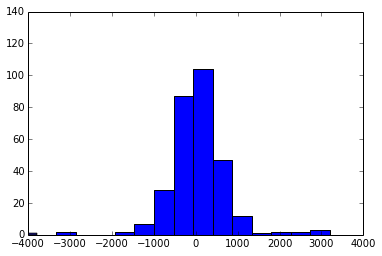


CH
348
0.0
34.1867816091954
646.1540750284323


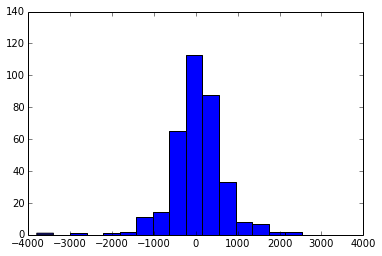


NL
331
0.0
29.332326283987914
605.2678003190385


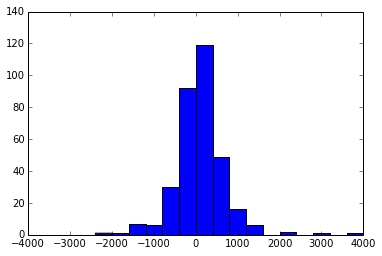


DK
290
0.0
7.9862068965517246
713.3049450531914


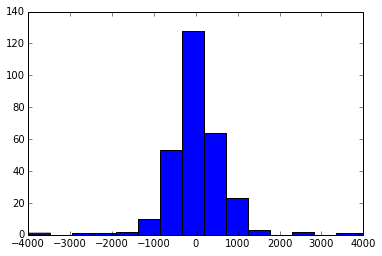


CA
316
0.0
-12.306962025316455
577.3671122921651


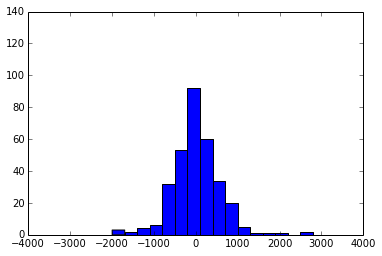


IR
262
0.0
-42.045801526717554
503.43788874684856


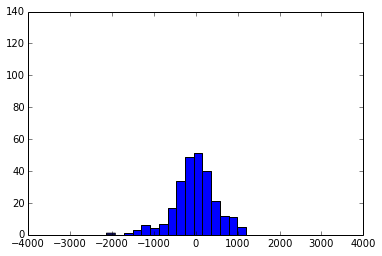


TR
329
0.0
-57.45896656534954
647.2900715800492


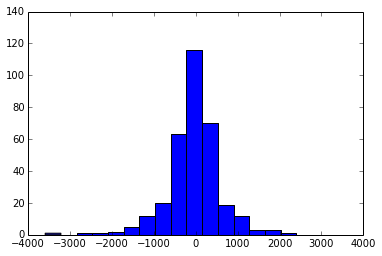


US
347
0.0
-27.40057636887608
615.4621218241169


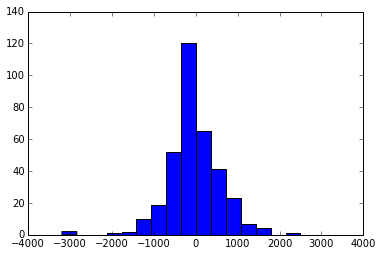


DE
281
-100.0
-62.096085409252666
630.5425455904008


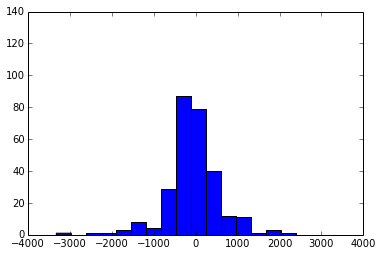


NZ
276
0.0
-9.398550724637682
620.0421858001379


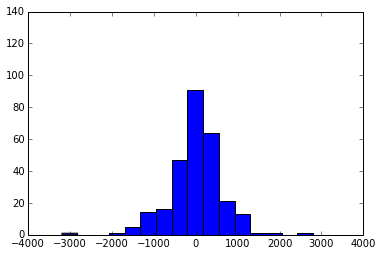


AU
291
0.0
-7.254295532646048
596.2017900921129


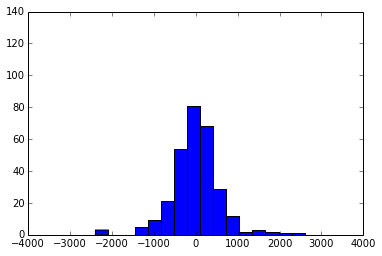


GB
269
0.0
-86.10780669144981
776.7361076599782


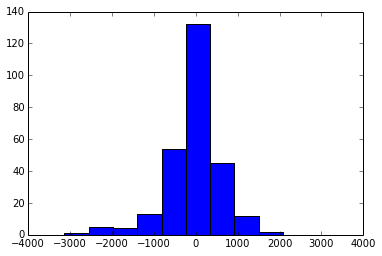


BR
272
0.0
49.25
618.92117655976


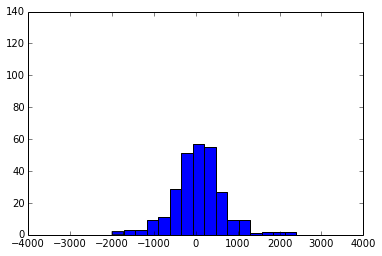


FI
316
0.0
-33.563291139240505
625.0119384535159


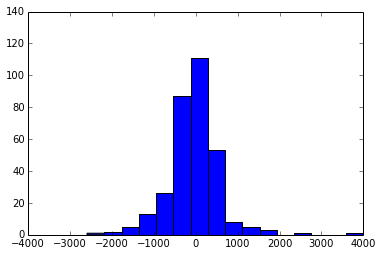


IE
346
0.0
16.248554913294797
628.0435228104454


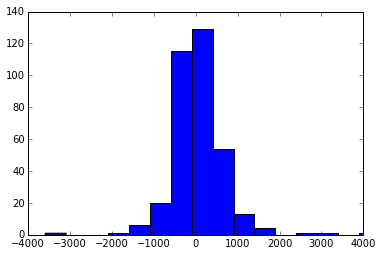


ES
319
0.0
-13.003134796238244
581.8285493212069


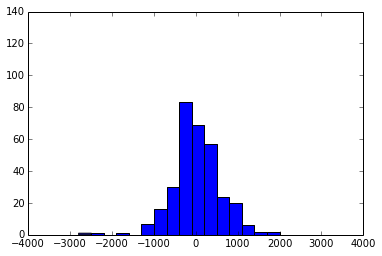

In [98]:
%matplotlib inline

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

ratingsByNat = defaultdict(list)

for nat in usersByNat:
    for user in usersByNat[nat]:
        try:
            ratingsByNat[nat].append(eloRatings[user])
        except:
            # This player doesn't have a score computed,
            # so assume they haven't played yet
            pass
        
for nat in ratingsByNat:
    print(nat)
    print(len(ratingsByNat[nat]))
    print(np.median(ratingsByNat[nat]))
    print(np.mean(ratingsByNat[nat]))
    print(np.std(ratingsByNat[nat]))
    plt.hist(ratingsByNat[nat], bins=16)
    plt.xlim(-4000, 4000)
    plt.ylim(0, 140)
    plt.show()
    print('')

In [111]:
from collections import Counter

# Look at the top 100 players and see their nationality
rankedPlayers = []

for playerId in eloRatings:
    rankedPlayers.append((playerId, eloRatings[playerId]))
    
rankedPlayers.sort(key=lambda p: p[1], reverse=True)

topRankedPlayersByNat = Counter()

for p in rankedPlayers[0:100]:
    topRankedPlayersByNat[userDataById[p[0]]['nat']] += p[1]
    
print(topRankedPlayersByNat)

print(len(ratingsByNat.keys()))
print(len(topRankedPlayersByNat.keys()))

Counter({u'FR': 20265, u'CH': 19930, u'IE': 18959, u'DK': 17746, u'US': 15331, u'NL': 13540, u'BR': 13132, u'AU': 13066, u'FI': 13066, u'TR': 12800, u'CA': 10499, u'DE': 9533, u'ES': 8333, u'NZ': 6400, u'GB': 5480})
16
15
